In [1]:
import numpy as np #
import matplotlib.pyplot as plt
import math
import pip
def install(package):
   pip.main(['install', package])

install('sounddevice') 
import sounddevice as sd 

In [2]:
mu=np.loadtxt('music.txt')
cs=np.loadtxt('corrupted_speech.txt')
fs=22000
n=mu.size
mu=np.mat(mu)
cs=np.mat(cs)

In [3]:

m=32
miu=0.2
t=10
ita=0.5

w=np.zeros((1,m+1))
for i in range(m+1):
    w[0,i]=np.random.normal(0,1)
x=mu
xk=np.zeros((1,n))
X=np.zeros((m+1,n));
X[0,:]=x;

for j in range(1,m):
    for i in range(1,n):
        xk[0,i]=(1-miu)*xk[0,i-1]+miu*x[0,i-1]    
    X[j,:]=xk
    x=xk
    xk=np.zeros((1,n))

y=np.zeros((1,n))
e=np.zeros((1,n))
w1=np.zeros((m+1,n))
es=np.zeros((1,t))
for t1 in range(t):
    for i in range(n):
        y[0,i]=w@X[:,i]
        e[0,i]=cs[0,i]-y[0,i]  
        w1[:,i]=w
        w=w+2*ita*e[0,i]*(X[:,i].T)/((X[:,i].T)@X[:,i])
    es[0,t1]=e@e.T


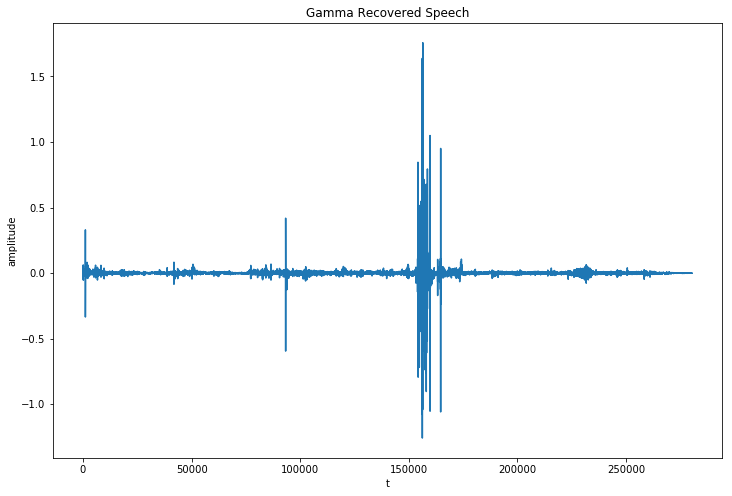

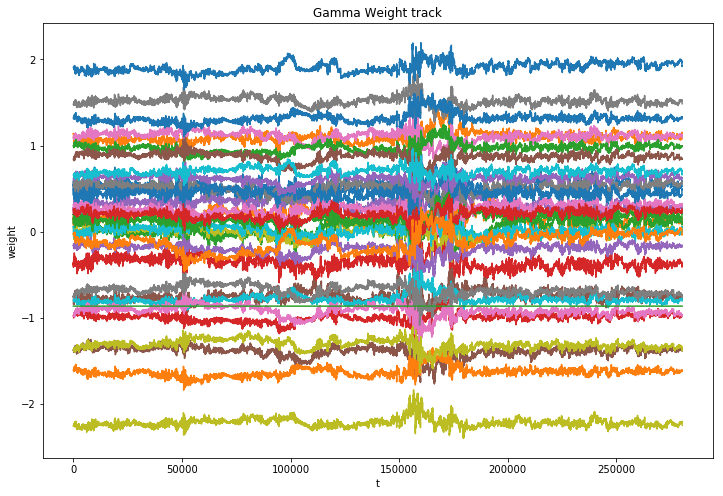

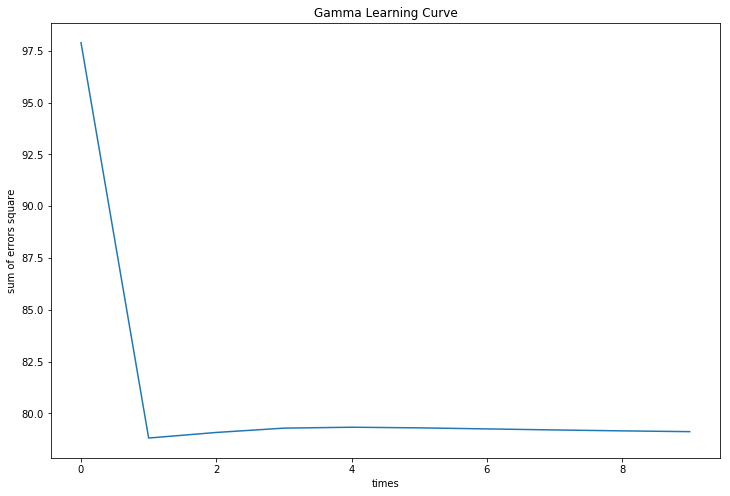

In [4]:
sd.play(e.T,fs) 
plt.figure(figsize=(12, 8)) 
plt.plot(e[0,:])
plt.title('Gamma Recovered Speech')
plt.xlabel('t')
plt.ylabel('amplitude')
plt.show()
plt.figure(figsize=(12, 8)) 
plt.plot(w1.T)
plt.title('Gamma Weight track')
plt.xlabel('t')
plt.ylabel('weight')
plt.show()
plt.figure(figsize=(12, 8)) 
plt.plot(es[0,:])
plt.title('Gamma Learning Curve')
plt.xlabel('times')
plt.ylabel('sum of errors square')
plt.show()
erle=10*math.log((cs@(cs.T)/(e@(e.T))),10)

In [5]:
print(erle)

28.769294789045862


In [6]:
sd.play(e.T,fs) 

In [17]:
f=open('recoveredspeechgamma.txt','wf+')
f.write(e)


ValueError: invalid mode: 'wf+'

In [14]:
print(e)

[[-0.0123883  -0.01153218 -0.00668113 ...,  0.00045317  0.0002021
  -0.00015481]]


In [ ]:
for i in range(n):
    f.write(e[0,i])